In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
from tensorflow import keras
from keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
print('Dimension de X_train',X_train.shape)
print('Dimension de Y_train',Y_train.shape)
print('Dimension de X_test',X_test.shape)
print('Dimension de Y_test',Y_test.shape)


Dimension de X_train (60000, 28, 28)
Dimension de Y_train (60000,)
Dimension de X_test (10000, 28, 28)
Dimension de Y_test (10000,)


In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
Y_train[1]

0

In [ ]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /=255
X_test /=255

In [ ]:
nb_classes=10
print('Dimension avant one-hot encoder', Y_train.shape)

Dimension avant one-hot encoder (60000,)


In [ ]:
Y_train=to_categorical(Y_train,nb_classes)

In [ ]:
print('Dimension apres one-hot encoder', Y_train.shape)

Dimension apres one-hot encoder (60000, 10)


In [ ]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model=Sequential()
model.add(Dense(400, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(400))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
Y_test=to_categorical(Y_test,nb_classes)

In [ ]:
print('Dimension de X_train',X_train.shape)
print('Dimension de Y_train',Y_train.shape)
print('Dimension de X_test',X_test.shape)
print('Dimension de Y_test',Y_test.shape)

Dimension de X_train (60000, 784)
Dimension de Y_train (60000, 10)
Dimension de X_test (10000, 784)
Dimension de Y_test (10000, 10)


In [ ]:
history= model.fit(X_train, Y_train,
                batch_size=100,
                epochs=100,
                verbose=2,
                validation_data=(X_test,Y_test))

Epoch 1/100
600/600 - 4s - loss: 0.2209 - accuracy: 0.9343 - val_loss: 0.1064 - val_accuracy: 0.9676 - 4s/epoch - 6ms/step
Epoch 2/100
600/600 - 2s - loss: 0.0833 - accuracy: 0.9733 - val_loss: 0.0824 - val_accuracy: 0.9723 - 2s/epoch - 3ms/step
Epoch 3/100
600/600 - 2s - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0768 - val_accuracy: 0.9767 - 2s/epoch - 3ms/step
Epoch 4/100
600/600 - 2s - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.0783 - val_accuracy: 0.9764 - 2s/epoch - 3ms/step
Epoch 5/100
600/600 - 2s - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0802 - val_accuracy: 0.9767 - 2s/epoch - 3ms/step
Epoch 6/100
600/600 - 2s - loss: 0.0241 - accuracy: 0.9918 - val_loss: 0.0722 - val_accuracy: 0.9811 - 2s/epoch - 3ms/step
Epoch 7/100
600/600 - 2s - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0772 - val_accuracy: 0.9805 - 2s/epoch - 4ms/step
Epoch 8/100
600/600 - 2s - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0854 - val_accuracy: 0.9775 - 2s/epoch - 4ms/step
Epoch 9/100
600/

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 400)               314000    
                                                                 
 activation_9 (Activation)   (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 400)               160400    
                                                                 
 activation_10 (Activation)  (None, 400)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                4010      
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                                 
Total params: 478,410
Trainable params: 478,410
Non-tr

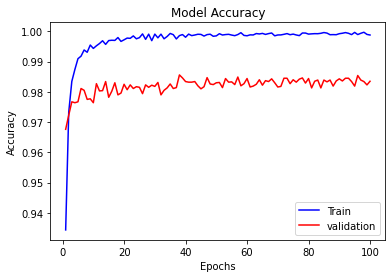

In [ ]:
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

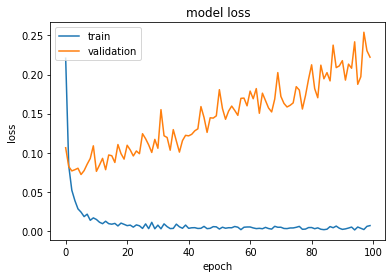

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper left')

In [ ]:
model1=Sequential()
model1.add(Dense(512, input_shape=(784,)))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(10))
model1.add(Activation('softmax'))


In [ ]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history= model1.fit(X_train, Y_train,
                batch_size=100,
                epochs=100,
                verbose=2,
                validation_data=(X_test,Y_test))

Epoch 1/100
600/600 - 3s - loss: 0.2357 - accuracy: 0.9303 - val_loss: 0.1045 - val_accuracy: 0.9674 - 3s/epoch - 5ms/step
Epoch 2/100
600/600 - 2s - loss: 0.0988 - accuracy: 0.9690 - val_loss: 0.0807 - val_accuracy: 0.9753 - 2s/epoch - 3ms/step
Epoch 3/100
600/600 - 2s - loss: 0.0721 - accuracy: 0.9773 - val_loss: 0.0693 - val_accuracy: 0.9787 - 2s/epoch - 3ms/step
Epoch 4/100
600/600 - 2s - loss: 0.0573 - accuracy: 0.9818 - val_loss: 0.0622 - val_accuracy: 0.9800 - 2s/epoch - 4ms/step
Epoch 5/100
600/600 - 2s - loss: 0.0463 - accuracy: 0.9852 - val_loss: 0.0618 - val_accuracy: 0.9819 - 2s/epoch - 4ms/step
Epoch 6/100
600/600 - 2s - loss: 0.0405 - accuracy: 0.9864 - val_loss: 0.0670 - val_accuracy: 0.9810 - 2s/epoch - 3ms/step
Epoch 7/100
600/600 - 2s - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0658 - val_accuracy: 0.9819 - 2s/epoch - 3ms/step
Epoch 8/100
600/600 - 2s - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0627 - val_accuracy: 0.9827 - 2s/epoch - 3ms/step
Epoch 9/100
600/

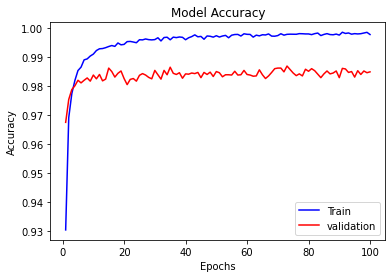

In [ ]:
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

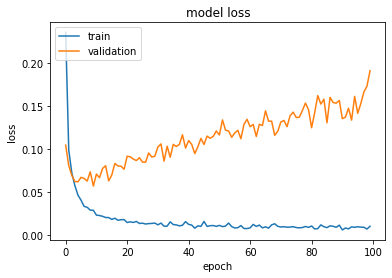

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper left')